In [246]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import wrangle

import warnings
warnings.filterwarnings('ignore')

In [247]:
# set style defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [248]:
# change setting to view all columns in jupyter notebook
pd.set_option('display.max_columns', None)

In [249]:
# use a function to pull in the data
fires = wrangle.wrangle_fires()
fires.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


# Univariate Analysis

In [250]:
# check info
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166753 entries, 0 to 2166752
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   fire_year         int64         
 1   discovery_date    datetime64[ns]
 2   general_cause     object        
 3   containment_date  datetime64[ns]
 4   fire_size         float64       
 5   latitude          float64       
 6   longitude         float64       
 7   state             object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 148.8+ MB


In [251]:
# set discovery date as index
df = fires.set_index('discovery_date').sort_index()
df.head(2)

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state
discovery_date,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY


In [252]:
# check oldest and newest discovery dates in the dataset
print(df.index.min(), df.index.max())

1992-01-01 00:00:00 2018-12-31 00:00:00


### We have 27 years of data.

In [253]:
# create a year and month column
df['year'] = df.index.year
df['month'] = df.index.month_name()
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [254]:
# check counts for each cause
df.general_cause.value_counts()

Missing data/not specified/undetermined       547438
Debris and open burning                       507219
Natural                                       312807
Arson/incendiarism                            310320
Equipment and vehicle use                     175824
Recreation and ceremony                        92725
Misuse of fire by a minor                      64630
Smoking                                        61689
Railroad operations and maintenance            36437
Power generation/transmission/distribution     28491
Fireworks                                      17205
Other causes                                    9763
Firearms and explosives use                     2205
Name: general_cause, dtype: int64

### It looks like a good chunk of our data has no specified cause.

<AxesSubplot:>

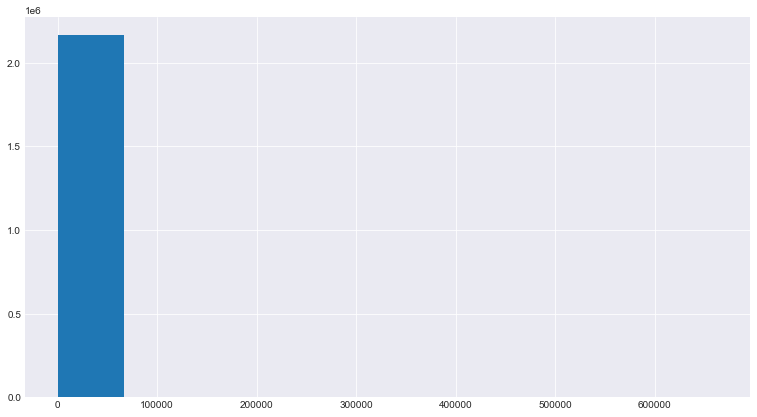

In [255]:
# plot fire size
df.fire_size.hist()

In [256]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

### The data contains some outliers when it comes to fire size

In [257]:
# # create a scatter plot of fire by latitude and longitude
# sns.scatterplot(x='longitude', y='latitude', hue='state', data=df)

In [258]:
# check value counts by state
df.state.value_counts()

CA    235229
GA    180175
TX    167061
NC    123793
FL     99356
AZ     93417
NY     93171
SC     86021
MS     83106
AL     72482
OR     67157
CO     61226
MN     48679
OK     48140
MT     47262
NM     41193
ID     40154
WA     37789
AR     36678
WI     35316
SD     34781
UT     34328
TN     33611
LA     32243
NJ     30553
KY     29610
VA     23747
WV     23731
PR     22159
MO     21998
NV     18874
ND     18308
WY     17535
KS     17473
ME     14924
MI     14166
AK     14125
PA     10803
NE     10354
HI      9949
MA      6778
CT      6006
IA      5094
OH      4727
MD      3947
NH      2935
IL      2814
IN      2206
VT       671
RI       631
DE       187
DC        80
Name: state, dtype: int64

### States in the NorthEastern part of the United States have the least wildfires. Not surprisingly, California has the most. Other states with the most wildfires seem to be primarily in the South.

# How has the occurrence of wildfires changed over time? How does wildfire seasonality vary by location?

### What is the number of fires per year for all years we have in the data?

<AxesSubplot:xlabel='year', ylabel='count'>

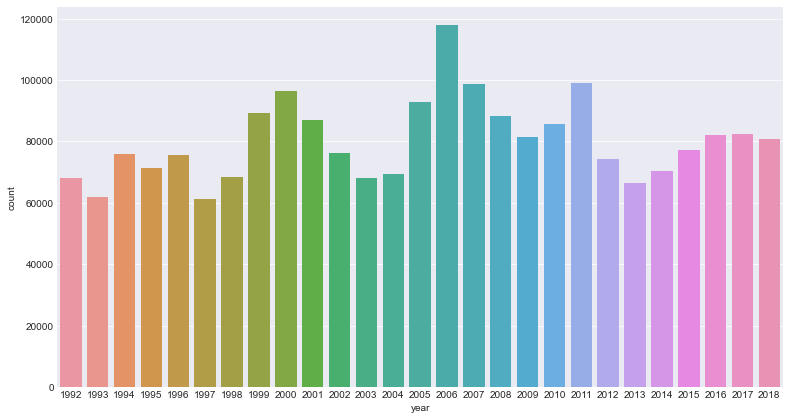

In [259]:
# plot counts by year
sns.countplot(data=df, x='year')

### 2006, 2007, and 2011 had the most wildfires. There does almost appear to be a cycle of 5-6 years for the amount of wildfires.

### Are wildfires more prevalent at certain times of year?

<AxesSubplot:xlabel='month', ylabel='count'>

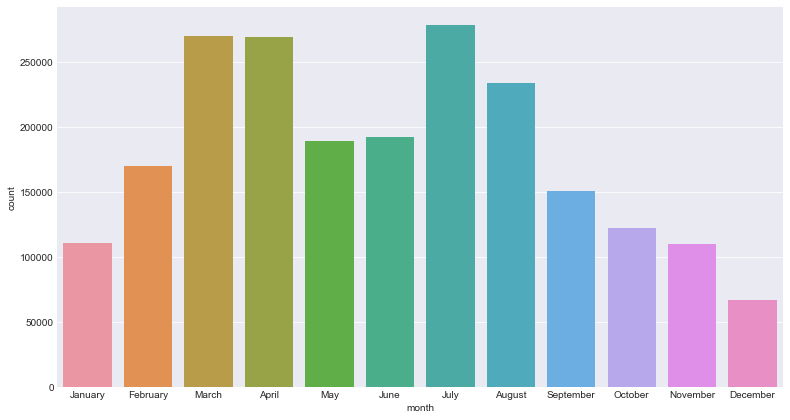

In [260]:
# plot counts by month
sns.countplot(data=df, x='month')

### Not surprisingly, July & August tend to have more fires which is likely due to heat, camping, and dry weather. It is surprising to see that March & April have a higher number of fires as well.

### Get visualization of value counts by state

<AxesSubplot:xlabel='count', ylabel='state'>

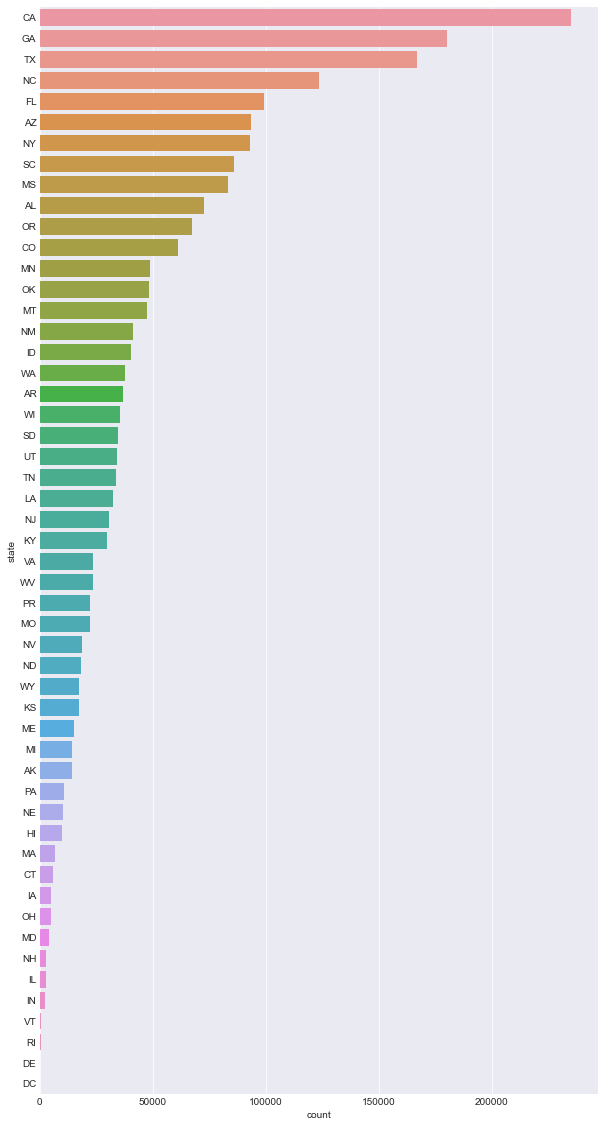

In [261]:
# plot counts by state
plt.figure(figsize=(10,20))
sns.countplot(data=df, y='state', order=df.state.value_counts().index)

### What does the number of fires and size of fires look like by month?

In [262]:
# resample by month and get count of wildfires by month
num_fires_by_month = df.resample('M').fire_year.count()
num_fires_by_month.head()

discovery_date
1992-01-31    3603
1992-02-29    7114
1992-03-31    8706
1992-04-30    7807
1992-05-31    8572
Freq: M, Name: fire_year, dtype: int64

In [263]:
# check number of rows
num_fires_by_month.shape

(324,)

In [264]:
# check which month and year combination had the most fires
num_fires_by_month.idxmax()

Timestamp('2006-03-31 00:00:00', freq='M')

In [265]:
# check how many fires happened that month
num_fires_by_month.max()

19001

### March 2006 had the highest number of fires within the dataset with slightly over 19K fires occurring in that month.

<AxesSubplot:xlabel='discovery_date'>

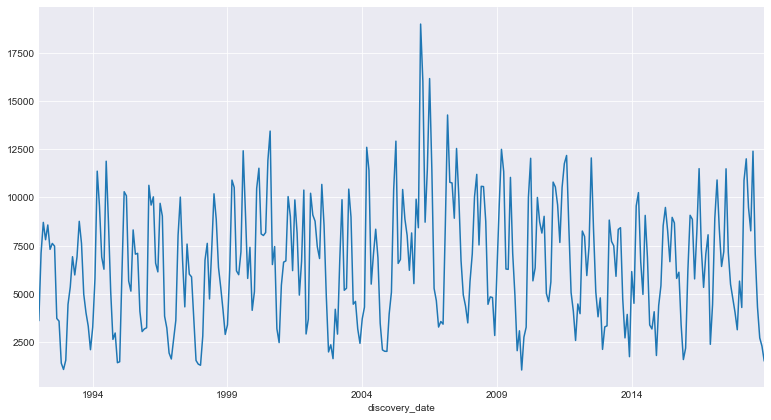

In [266]:
# plot monthly number of fires over the years
num_fires_by_month.plot()

<AxesSubplot:xlabel='discovery_date'>

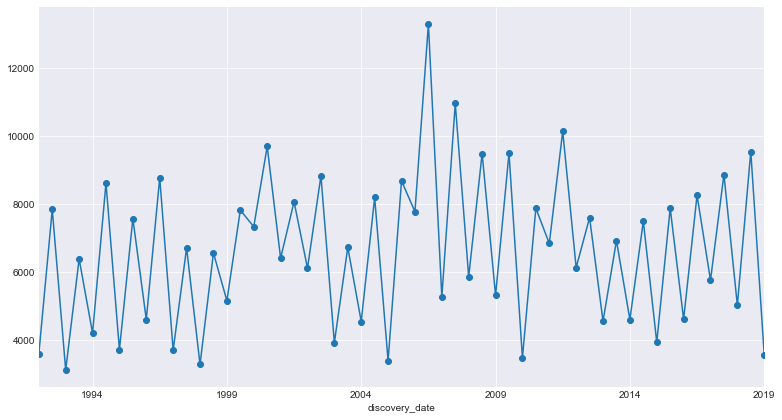

In [267]:
# plot number of fires over the years resampled by 6 months
num_fires_by_month.resample('6M').mean().plot(marker='o')

<AxesSubplot:xlabel='discovery_date'>

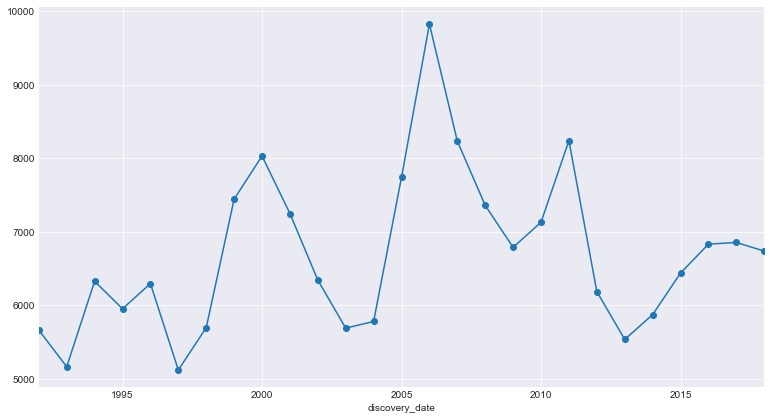

In [268]:
# plot number of fires over the years resampled by a year
num_fires_by_month.resample('Y').mean().plot(marker='o')

In [269]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [270]:
# resample by month and get summed size of wildfires by month
size_fires_by_month = df.resample('M').fire_size.sum()
size_fires_by_month.head()

discovery_date
1992-01-31     32394.200
1992-02-29     84918.650
1992-03-31    129638.123
1992-04-30     94382.285
1992-05-31    124084.533
Freq: M, Name: fire_size, dtype: float64

In [271]:
# check which month and year combination had the largest summed size of wildfires
size_fires_by_month.idxmax()

Timestamp('2015-06-30 00:00:00', freq='M')

In [272]:
# check total sum of fire sizes that month
size_fires_by_month.max()

5248481.509999639

### Figure out how much this is and determine a good reference so audience can understand the impact

<AxesSubplot:xlabel='year'>

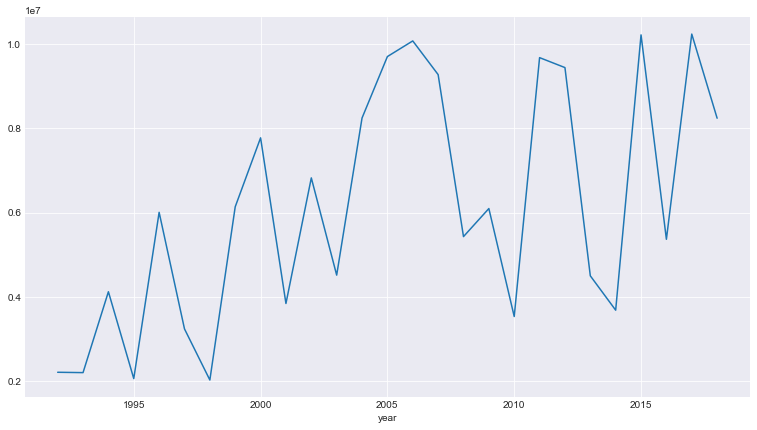

In [273]:
# plot monthly summed size of fires over the years
df.groupby('year').fire_size.sum().plot()

<AxesSubplot:xlabel='discovery_date'>

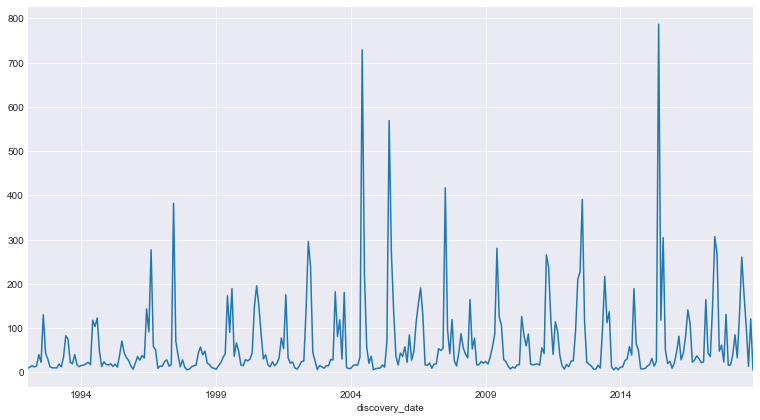

In [274]:
# plot monthly average size of fires over the years
df.resample('M').fire_size.mean().plot()

<AxesSubplot:xlabel='discovery_date'>

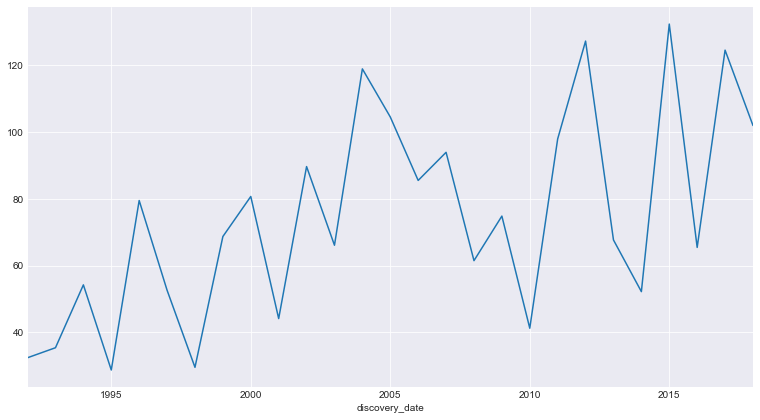

In [275]:
# plot yearly average size of fires over the years
df.resample('Y').fire_size.mean().plot()

### When resampling by year, there is not a clear trend in the *number* of wildfires however, we do see that the average *size* of wildfires is on an upward trend

In [276]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [277]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

In [278]:
df[df.fire_size > 100]

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Missing data/not specified/undetermined,NaT,150.0,41.167488,-105.813500,WY,1992,January
1992-01-01,1992,Natural,NaT,400.0,42.946171,-105.897697,WY,1992,January
1992-01-03,1992,Equipment and vehicle use,NaT,175.0,28.500000,-81.700000,FL,1992,January
1992-01-04,1992,Missing data/not specified/undetermined,NaT,240.0,29.790000,-84.950000,FL,1992,January
1992-01-04,1992,Missing data/not specified/undetermined,NaT,300.0,41.239269,-104.820198,WY,1992,January
...,...,...,...,...,...,...,...,...,...
2018-12-20,2018,Missing data/not specified/undetermined,2018-12-20,110.0,35.651100,-98.389700,OK,2018,December
2018-12-20,2018,Missing data/not specified/undetermined,2018-12-22,420.0,36.670800,-96.732200,OK,2018,December
2018-12-23,2018,Missing data/not specified/undetermined,2018-12-23,559.0,29.562045,-94.466741,TX,2018,December


In [279]:
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month
discovery_date,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January


In [280]:
top_five_wildfire_states = df.state.value_counts().head(5).index.to_list()
top_five_wildfire_states

['CA', 'GA', 'TX', 'NC', 'FL']

In [281]:
num_fires_by_year = df[df.state.isin(top_five_wildfire_states)]\
.groupby(['year', 'state']).count().reset_index()\
.iloc[:, 0:3].rename(columns={'fire_year':'num_fires'})
num_fires_by_year

,year,state,num_fires
0,1992,CA,10831
1,1992,FL,4222
2,1992,GA,6458
3,1992,NC,5696
4,1992,TX,1168
...,...,...,...
130,2018,CA,9488
131,2018,FL,2072
132,2018,GA,2574
133,2018,NC,3085


<AxesSubplot:xlabel='year', ylabel='num_fires'>

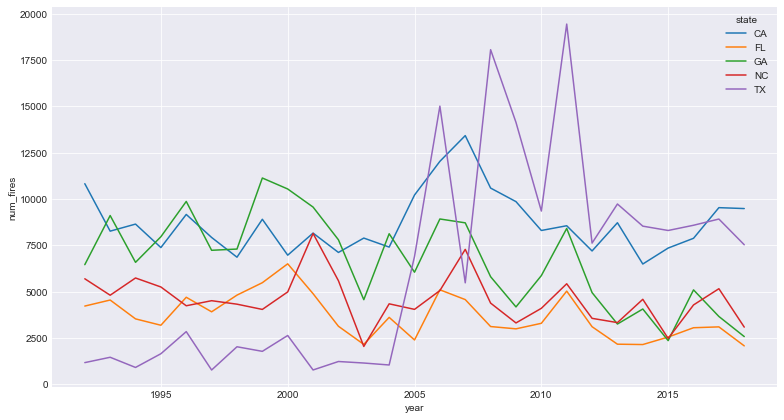

In [282]:

sns.lineplot(data=num_fires_by_year, x='year', y='num_fires', hue='state')

In [283]:

top_causes_of_wildfires = df.general_cause.value_counts().head()
top_causes_of_wildfires

Missing data/not specified/undetermined    547438
Debris and open burning                    507219
Natural                                    312807
Arson/incendiarism                         310320
Equipment and vehicle use                  175824
Name: general_cause, dtype: int64

In [284]:
top_causes_of_wildfires[1:].index.to_list()

['Debris and open burning',
 'Natural',
 'Arson/incendiarism',
 'Equipment and vehicle use']

In [285]:
# create a new dataframe that groups by year and gets a count by year of the top causes for wildfires
num_causes_by_year = df[df.general_cause.isin(top_causes_of_wildfires[1:].index.to_list())]\
.groupby(['year', 'general_cause']).count().reset_index().iloc[:, 0:3]\
.rename(columns={'fire_year':'num_occurrences'})
num_causes_by_year

,year,general_cause,num_occurrences
0,1992,Arson/incendiarism,11250
1,1992,Debris and open burning,12792
2,1992,Equipment and vehicle use,5637
3,1992,Natural,12576
4,1993,Arson/incendiarism,11036
...,...,...,...
103,2017,Natural,8752
104,2018,Arson/incendiarism,6019
105,2018,Debris and open burning,18674
106,2018,Equipment and vehicle use,7385


<AxesSubplot:xlabel='year', ylabel='num_occurrences'>

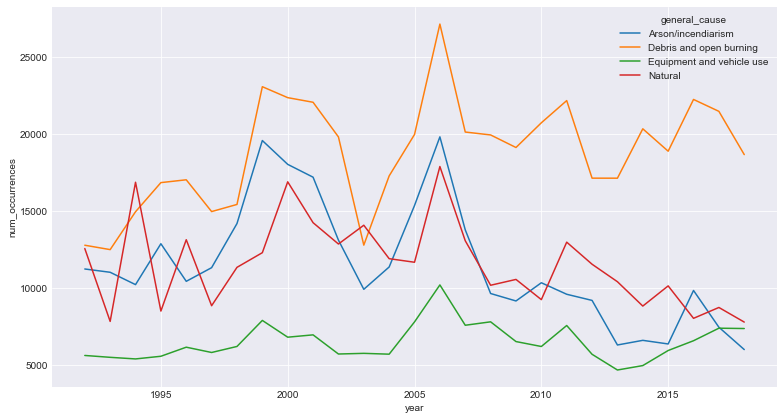

In [286]:
# plot trends over the years by the top four causes of wildfires, excluding observations where cause was not specified
sns.lineplot(data=num_causes_by_year, x='year', y='num_occurrences', hue='general_cause')

In [287]:
num_causes_by_year.head()

,year,general_cause,num_occurrences
0,1992,Arson/incendiarism,11250
1,1992,Debris and open burning,12792
2,1992,Equipment and vehicle use,5637
3,1992,Natural,12576
4,1993,Arson/incendiarism,11036


In [288]:
num_causes_by_year.to_csv('num_causes_by_year')

In [289]:
num_causes_by_year.shape

(108, 3)

Text(0.5, 1.0, 'Top Causes Of Wildfires Across The U.S.')

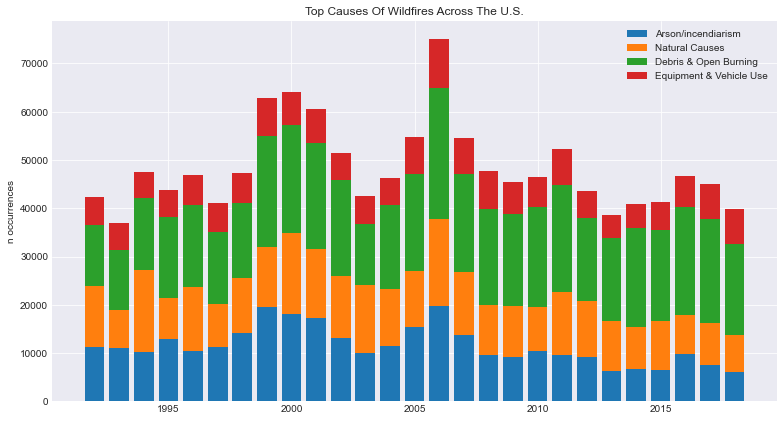

In [292]:
natural = num_causes_by_year[num_causes_by_year.general_cause == "Natural"]
arson = num_causes_by_year[num_causes_by_year.general_cause == "Arson/incendiarism"]
debris = num_causes_by_year[num_causes_by_year.general_cause == "Debris and open burning"]
equipment = num_causes_by_year[num_causes_by_year.general_cause == "Equipment and vehicle use"]

natural = natural.set_index("year")
arson = arson.set_index("year")
equipment = equipment.set_index("year")
debris = debris.set_index("year")

fig, ax = plt.subplots()
labels = arson.index

ax.bar(labels, arson.num_occurrences, label="Arson/incendiarism")
ax.bar(labels, natural.num_occurrences, label="Natural Causes", bottom=arson.num_occurrences)
ax.bar(labels, debris.num_occurrences, label="Debris & Open Burning", bottom=natural.num_occurrences + arson.num_occurrences)
ax.bar(labels, equipment.num_occurrences, label="Equipment & Vehicle Use", bottom=debris.num_occurrences + natural.num_occurrences + arson.num_occurrences)

ax.legend()
ax.set_ylabel("n occurrences")
ax.set_title("Top Causes Of Wildfires Across The U.S.")

<AxesSubplot:xlabel='count', ylabel='year'>

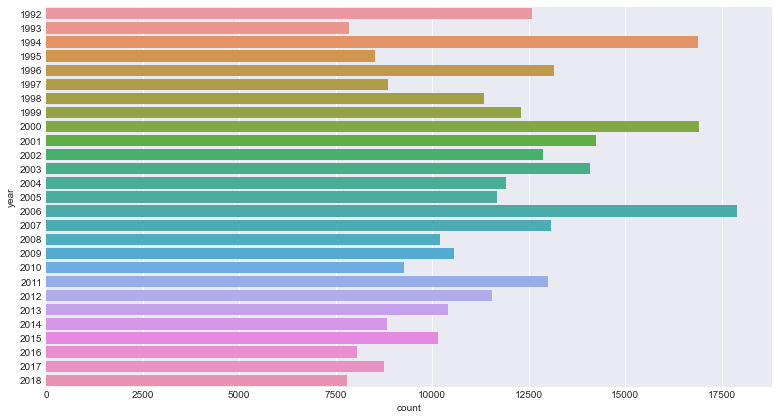

In [174]:
# plot wildfires caused by natural causes by year
sns.countplot(data=df[df.general_cause == 'Natural'], y='year')

### In recent years, we have seen a decrease in number of wildfires that were caused by natural causes

<AxesSubplot:xlabel='count', ylabel='year'>

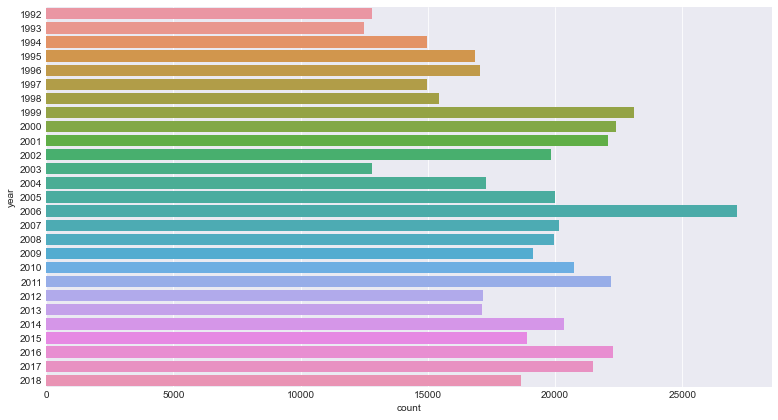

In [144]:
# plot wildfires caused by Debris and open burning by year
sns.countplot(data=df[df.general_cause == 'Debris and open burning'], y='year')

### There appears to be a slight upward trend in debris and open burning as a cause of wildfires

<AxesSubplot:xlabel='count', ylabel='year'>

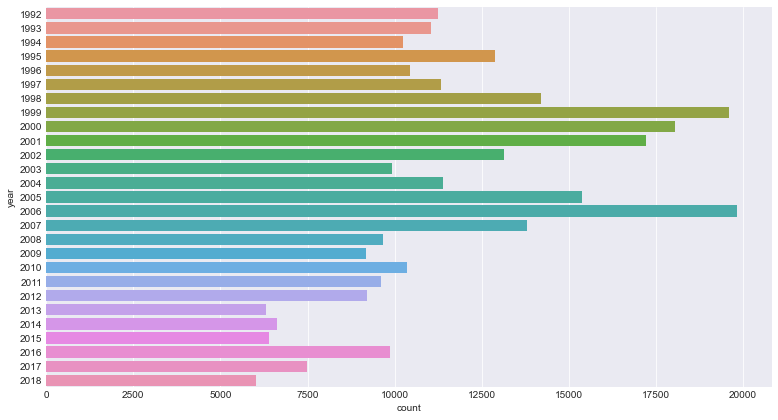

In [145]:
# plot wildfires caused by Arson/incendiarism by year
sns.countplot(data=df[df.general_cause == 'Arson/incendiarism'], y='year')

### There are some spikes but otherwise a downward trend in arson/incendiarism as a cause for wildfires

<AxesSubplot:xlabel='count', ylabel='year'>

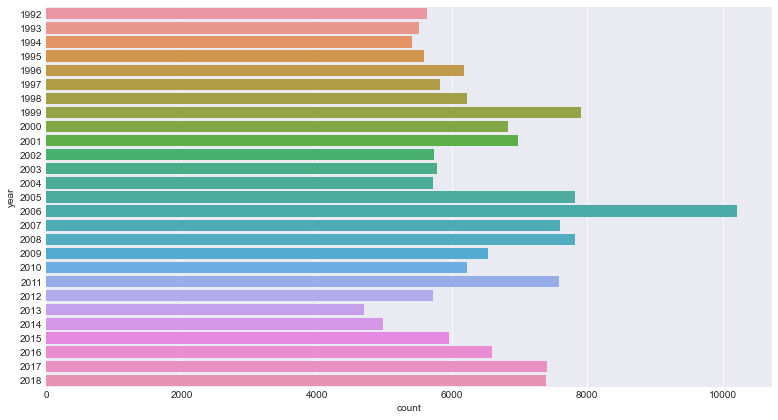

In [165]:
# plot wildfires caused by Equipment and vehicle use by year
sns.countplot(data=df[df.general_cause == 'Equipment and vehicle use'], y='year')

### There are no obvious trends or anything that really stands out in this plot for equipment and vehicle use as a cause for wildfires. 

### There's no one cause for the higher number of fires in 2006. All causes have higher numbers for this year.

In [148]:
# get statistics for fire size
df.fire_size.describe().apply(lambda x: format(x, 'f'))

count    2166753.000000
mean          75.990398
std         2536.041295
min            0.000010
25%            0.100000
50%            0.970000
75%            3.000000
max       662700.000000
Name: fire_size, dtype: object

### I want to get a better understanding of range of wildfire sizes

In [157]:
print(f'The 10th percentile is: {df.fire_size.quantile(.1)}')
print(f'The 20th percentile is: {df.fire_size.quantile(.2)}')
print(f'The 25th percentile is: {df.fire_size.quantile(.25)}')
print(f'The 30th percentile is: {df.fire_size.quantile(.3)}')
print(f'The 40th percentile is: {df.fire_size.quantile(.4)}')
print(f'The 50th percentile is: {df.fire_size.quantile(.5)}')
print(f'The 60th percentile is: {df.fire_size.quantile(.6)}')
print(f'The 70th percentile is: {df.fire_size.quantile(.7)}')
print(f'The 75th percentile is: {df.fire_size.quantile(.75)}')
print(f'The 80th percentile is: {df.fire_size.quantile(.8)}')
print(f'The 90th percentile is: {df.fire_size.quantile(.9)}')
print(f'The 100th percentile is: {df.fire_size.quantile(1)}')

The 10th percentile is: 0.1
The 20th percentile is: 0.1
The 25th percentile is: 0.1
The 30th percentile is: 0.16
The 40th percentile is: 0.3
The 50th percentile is: 0.97
The 60th percentile is: 1.0
The 70th percentile is: 2.0
The 75th percentile is: 3.0
The 80th percentile is: 5.0
The 90th percentile is: 15.5
The 100th percentile is: 662700.0


The smallest wildfire is only about 4.5 square feet

25% of fires are less than 1/10 of an acre

50% are less than one acre

75% are less than three acres

20% of fires are greater than 5 acres which is equivalent to three and a quarter football fields.

The largest wildfire is larger than 500,000 football fields or 85% of Rhode Island, our smallest state

---

#### I am going to create a column categorizing the fires as:

* small: up to the size of two tennis courts
* medium: up to the size of a football field
* large: up to the size of 4 football fields
* extra_lg: anything larger than this

In [161]:
# create another column categorizing fire size
conditions = [df.fire_size <=.13, df.fire_size <=1.3, df.fire_size <=5.2, df.fire_size >5.2]
choices = ['small', 'medium', 'large', 'extra_lg']
df['size_category'] = np.select(conditions, choices)
df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state,year,month,size_category
discovery_date,,,,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA,1992,January,small
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY,1992,January,medium
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY,1992,January,medium
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY,1992,January,extra_lg
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY,1992,January,extra_lg


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

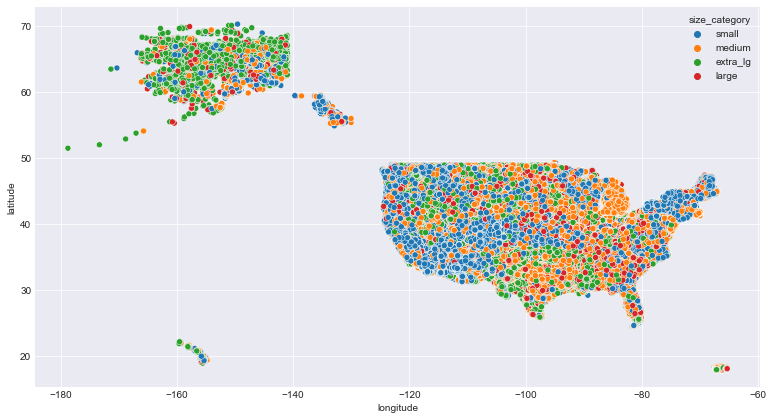

In [162]:
# plot size of fires by latitude and longitude
sns.scatterplot(x='longitude', y='latitude', hue='size_category', data=df)

### With all the fires plotted across all the years, we see that the large majority seems to be smaller fires. Alaska does have a large amount of extra-large fires

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

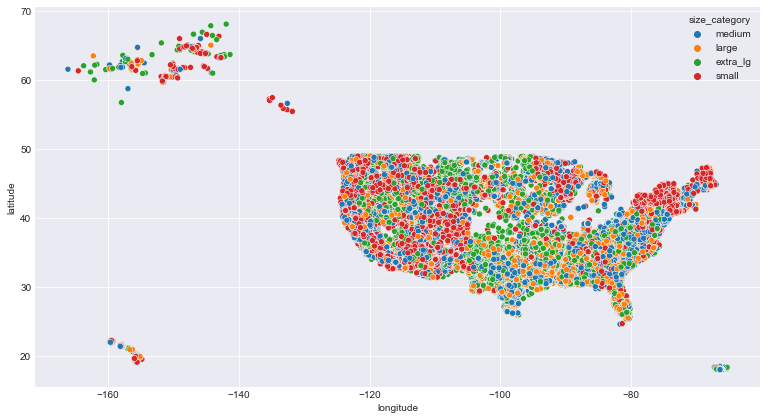

In [164]:
# checking to see what the fire size and location looks like for 2006
sns.scatterplot(x='longitude', y='latitude', hue='size_category', data=df[df.year == 2006])

### It appears that the majority of the largest wildfires in 2006 happened in the central area of the US